In [1]:
import pandas as pd

df_data = pd.read_csv(r"D:\UKM\Research Assistant\WAIdatahon\makeovermonday-2020w10\WDTAI.csv")

df_data 

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


In [2]:
df_data = df_data.pivot_table(index=['RecordID','Country','Gender','Question','Survey Year', 'Value'], columns=['Demographics Question'], values=['Demographics Response'], aggfunc='first')
df_data.columns = df_data.columns.droplevel()
df_data = df_data.reset_index().sort_values(by=['Country','Gender','Age', 'Education', 'Question', 'Survey Year'])

df_new = df_data[['RecordID','Survey Year', 'Country','Gender', 'Age', 'Education', 'Employment', 'Marital status', 'Residence', 'Question','Value']]
df_new = df_new.sort_values(by=['Country','Gender','Age', 'Education', 'Employment', 'Marital status', 'Residence', 'Question'])

#remove all the special characters using excel and delete the Demographics Questions
# df_new.to_csv(r"D:\UKM\Research Assistant\WAIdatahon\makeovermonday-2020w10\Summarization.csv")


In [11]:
import pandas as pd

dfdummy = pd.read_csv(r"D:\UKM\Research Assistant\WAIdatahon\makeovermonday-2020w10\Summarization.csv")

#take asean continents only
asean = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_asean = dfdummy.loc[dfdummy['Country'].isin(asean)]

#fetch all asean country in asean continents
asean = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_asean = dfdummy.loc[dfdummy['Country'].isin(asean)]

#take only years
df_asean['Year'] = pd.DatetimeIndex(df_asean['Survey Year']).year
df_asean.drop(columns=['Survey Year'], inplace=True)

#renaming all columns that needs to be renamed
df_asean.rename(columns={'RecordID': 'Case_ID' }, inplace=True)

#reset index and arrange the columns
df_asean = df_asean.reset_index()
df_asean = df_asean[['ID','Year','Country','Gender','Age','Education','Employment','Marital status', 'Residence', 'Question',
                    'Value']]
df_asean = df_asean.reset_index()
df_asean.set_index('index', inplace=True)

#explode all the data
df_finalized = pd.get_dummies(data=df_asean)

#renaming columns for better analysis
df_finalized.rename(columns={'Country_Cambodia': 'Cambodia',
                         'Country_Indonesia': 'Indonesia',
                         'Country_Myanmar': 'Myanmar',
                         'Country_Philippines' : 'Philippines',
                         'Gender_F': 'Female',
                         'Gender_M' : 'Male',
                         'Age_15-24': '15-24',
                         'Age_25-34' : '25-34',
                         'Employment_Employed for cash' : 'Employed_for_cash',
                          'Employment_Employed for kind': 'Employed_for_kind',
                          'Marital status_Married or living together': 'Married_living_together',
                        'Marital status_Never married' : 'Never_Married',
                        'Marital status_Widowed, divorced, separated' : 'Widowed/divorced/separated',
                          'Residence_Rural' :'Rural',
                          'Residence_Urban': 'Urban',
                          'Question_for at least one specific reason' : 'Specific_reason',
                          'Question_if she argues with him': 'Argues',
                          'Question_if she burns the food': 'Burn_food',
                          'Question_if she goes out without telling him' : 'Go_out_without_telling',
                          'Question_if she neglects the children': 'Neglects_children',
                          'Question_if she refuses to have sex with him': 'Refuse_sex'
                         }, inplace=True)
df_finalized

# df_finalized.to_csv(r"D:\UKM\Research Assistant\WAIdatahon\makeovermonday-2020w10\Data09032021.csv")

<ipython-input-11-6c8baf5d7fbb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asean['Year'] = pd.DatetimeIndex(df_asean['Survey Year']).year


,ID,Year,Value,Cambodia,Indonesia,Myanmar,Philippines,Female,Male,15-24,...,Never_Married,Widowed/divorced/separated,Rural,Urban,Specific_reason,Argues,Burn_food,Go_out_without_telling,Neglects_children,Refuse_sex
index,,,,,,,,,,,,,,,,,,,,,
0,361,2014,44.9,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,81,2014,20.2,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,11,2014,9.4,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,151,2014,25.3,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,221,2014,39.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,194,2017,4.4,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
552,264,2017,10.6,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
553,404,2017,8.5,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [15]:
df_finalizedYear = pd.get_dummies(data=df_asean['Year'])
df_new = pd.merge(df_finalized, df_finalizedYear, how="outer", on="index")
df_new.drop(columns=['Year'], inplace=True)
df_new = df_new.reset_index()
df_new.drop(columns=['index'], inplace=True)

# df_new.to_csv(r"D:\UKM\Research Assistant\WAIdatahon\makeovermonday-2020w10\Finale.csv")

In [16]:
df_new.columns

Index([                        'ID',                      'Value',
                         'Cambodia',                  'Indonesia',
                          'Myanmar',                'Philippines',
                           'Female',                       'Male',
                            '15-24',                      '25-34',
                        'Age_35-49',           'Education_Higher',
           'Education_No education',          'Education_Primary',
              'Education_Secondary',          'Employed_for_cash',
                'Employed_for_kind',      'Employment_Unemployed',
          'Married_living_together',              'Never_Married',
       'Widowed/divorced/separated',                      'Rural',
                            'Urban',            'Specific_reason',
                           'Argues',                  'Burn_food',
           'Go_out_without_telling',          'Neglects_children',
                       'Refuse_sex',                         2

# Check Correlations Between Data

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_finalized[df_finalized['Female'] == 1]['Year'].max())
print(df_finalized[df_finalized['Male'] == 1]['Year'].max())


2017
2015


It does show significant different for countries!


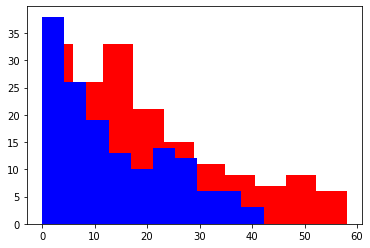

In [18]:
#Checking the correlations between data
A = df_finalized[df_finalized['Cambodia'] == 1]['Value']
B = df_finalized[df_finalized['Indonesia'] == 1]['Value']

plt.hist(A, label='CAMB', color='red')
plt.hist(B, label='INDO', color='blue')

print("It does show significant different for countries!")

# Train and Test Modals

In [19]:
X = df_finalized[['Cambodia', 'Indonesia', 'Myanmar', 'Philippines', 'Specific_reason', 'Argues', 
              'Burn_food']]
Y = df_finalized['Value']

In [20]:
Y = Y / Y.max()

(444, 7)
(112, 7)
(444,)
(112,)
TRAINING
0.12009706615716899
TESTING
0.1057106445331261


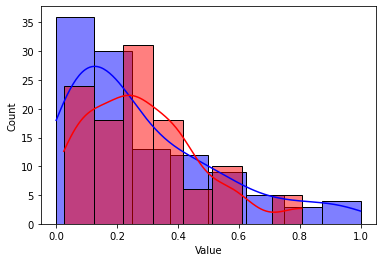

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


model = DecisionTreeRegressor()

# model fitting and training
model.fit(X_train, y_train)

print("TRAINING")
print(metrics.mean_absolute_error(y_train, model.predict(X_train)))

print("TESTING")
print(metrics.mean_absolute_error(y_test, model.predict(X_test)))

#CURRENT DATA
sns.histplot(y_test, kde=True, color='blue');

#PREDICTED DATA
sns.histplot(model.predict(X_test), kde=True, color='red');


In [22]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=10))

[-0.22983117 -0.16193753 -0.17667301 -0.11581993 -0.09649516 -0.12092285
 -0.12715979 -0.13632754 -0.10129011 -0.04204978]


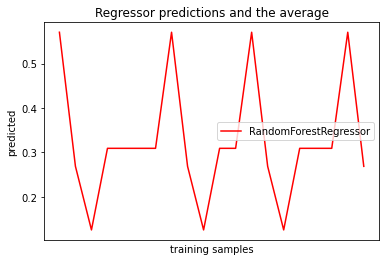

In [23]:
xt = X[:20]

pred1 = model.predict(xt)

plt.figure()

plt.plot(pred1, 'r-', label='RandomForestRegressor')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and the average')

plt.show()

# Forecasting WAI Data

Forecast the Violence Factors

In [ ]:
df_new.columns

In [ ]:
# X = df_finalized[['Specific_reason', 'Argues', 
#               'Burn_food', 'Go_out_without_telling','Neglects_children', 'Refuse_sex']]

Y = df_new['Value']
X = df_new[['Specific_reason', 'Argues', 
              'Burn_food', 'Go_out_without_telling','Neglects_children', 'Refuse_sex',2012, 2014,2015,2017]]
X

In [ ]:
Y = Y / Y.max()
Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


model = DecisionTreeRegressor()

# model fitting and training
model.fit(X_train, y_train)

print("TRAINING")
print(metrics.mean_absolute_error(y_train, model.predict(X_train)))

print("TESTING")
print(metrics.mean_absolute_error(y_test, model.predict(X_test)))

#CURRENT DATA
sns.histplot(y_test, kde=True, color='blue');

#PREDICTED DATA
sns.histplot(model.predict(X_test), kde=True, color='red');




In [ ]:
from sklearn import tree
model.fit(X_train, y_train)
plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(model, fontsize=10)
plt.show()

In [ ]:
xt = X[:20]

pred1 = model.predict(xt)

plt.figure()

plt.plot(pred1, 'r-', label='RandomForestRegressor')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and the average')

plt.show()